In [86]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense #layers
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical # takes the labelled data and one hot encodes it 

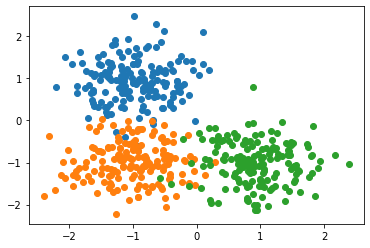

In [87]:
n_pts = 500
#define centers for the multiple classes
centers = [[-1,1], [-1,-1], [1,-1]]
X,y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.5) # x is datapoints, y is the label,random1123 is seed()
# print(X,y) # labels are 0 1 & 2 but we need to hot encoding
# visualizing
plt.scatter(X[y==0,0],X[y==0,1]) #get me all the x & y co-ordinates of the datase where y is = 0
plt.scatter(X[y==1,0],X[y==1,1]) #get me all the x & y co-ordinates of the datase where y is = 1
plt.scatter(X[y==2,0],X[y==2,1]) #get me all the x & y co-ordinates of the datase where y is = 2


In [88]:
# one hot encoding process

# print(y)
#y_cat to hold encoded values
y_cat = to_categorical(y, 3)#(labels, optional(it value of data classses we have) )
print(y_cat)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [89]:
model = Sequential()
#one input layer and one output layer
# 3 inout node x1,x2,bias, output has one hot labelin so 3 nodes 0 1 2
model.add(Dense(units=3,input_shape=(2,), activation='softmax')) #units - 3 output nodes 
#node with highest prob will indicate that the input that was fed in the dataclass matches the label with the highest prob in the soft max table (after comparing)
model.compile(Adam(0.2), loss = 'categorical_crossentropy', metrics =['accuracy'])# model optimizer

In [90]:
h = model.fit(x=X,y=y_cat, verbose = 1, batch_size=50, epochs=50)# used to train our data(Points, labels)(hot encoded)
# to check for overfitting train and test data graph of error vs epochs apoint where the test data error does not decrease but starts overshoots

Epoch 1/50
10/10 [==============================] - 0s 715us/step - loss: 0.4113 - accuracy: 0.8760
Epoch 2/50
10/10 [==============================] - 0s 616us/step - loss: 0.1294 - accuracy: 0.9680
Epoch 3/50
10/10 [==============================] - 0s 688us/step - loss: 0.1038 - accuracy: 0.9660
Epoch 4/50
10/10 [==============================] - 0s 662us/step - loss: 0.1008 - accuracy: 0.9640
Epoch 5/50
10/10 [==============================] - 0s 976us/step - loss: 0.0958 - accuracy: 0.9660
Epoch 6/50
10/10 [==============================] - 0s 1ms/step - loss: 0.0972 - accuracy: 0.9600
Epoch 7/50
10/10 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 0.9720
Epoch 8/50
10/10 [==============================] - 0s 1ms/step - loss: 0.0945 - accuracy: 0.9640
Epoch 9/50
10/10 [==============================] - 0s 750us/step - loss: 0.0964 - accuracy: 0.9640
Epoch 10/50
10/10 [==============================] - 0s 668us/step - loss: 0.0952 - accuracy: 0.9660
Epoch

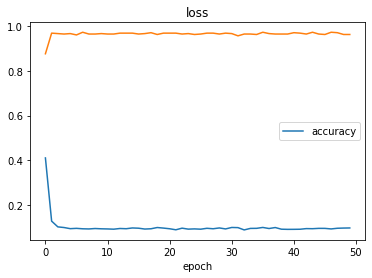

In [91]:


plt.plot(h.history['loss'])
plt.plot(h.history['accuracy'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])
plt.legend(['accuracy'])

In [92]:
def plot_decision_boundary(X, y_cat, model): # vstack X-points, labels,model
    x_span = np.linspace(min(X[:,0])-0.5,max(X[:,0])+0.5) #minimum value in the x direction AND MAX VALUE IN THE x DiRECTioN
    y_span = np.linspace(min(X[:,1])-0.5,max(X[:,1])+0.5) # to add some breathing room in the x dorection and y deirection add to max and subtract from min
    xx,yy = np.meshgrid(x_span,y_span)   # takes x span elements(50) and returd a 2d 50x50 matrix copies of the rows and for y 50x50 copies of cols
    ## why to do this , usinng these 50x50 matrces we create 50x50 grid for every 1 y co ordinated there are 5 x co- ordinates.
    #now we need to convert this 2d array back to 1d so use ravel function to do so 
    xx_,yy_ = xx.ravel(),yy.ravel()
    # to mae a gid we have ti cncat these in a column wise manner
    grid = np.c_[xx_,yy_]
    # predict_fn = model.predict_classes(grid) # array of predictions(predicts the classes)
    
    ### predict classes is deprecated syntax instead use the lines below.
    # prediction = np.argmax(model.predict(point), axis=1)
    predict_x=model.predict(grid) 
    classes_x=np.argmax(predict_x,axis=1)
    # z = predict_fn.reshape(xx.shape)
    z = classes_x.reshape(xx.shape)
    plt.contourf(xx,yy,z) # represents distinct class zones

79/79 [==============================] - 0s 400us/step


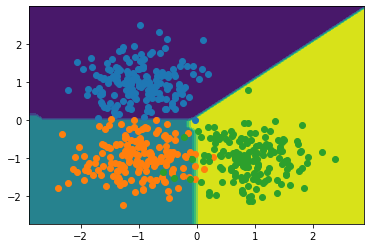

In [93]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0,0],X[y==0,1]) #get me all the x & y co-ordinates of the datase where y is = 0
plt.scatter(X[y==1,0],X[y==1,1]) #get me all the x & y co-ordinates of the datase where y is = 1
plt.scatter(X[y==2,0],X[y==2,1]) #get me all the x & y co-ordinates of the datase where y is = 2
 # purple is zone with labels zero,green with 2 abd dark green with 1

1/1 [==============================] - 0s 12ms/step
prediction is : [2]


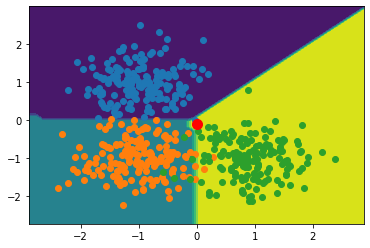

In [94]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0,0],X[y==0,1]) #get me all the x & y co-ordinates of the datase where y is = 0
plt.scatter(X[y==1,0],X[y==1,1]) #get me all the x & y co-ordinates of the datase where y is = 1
plt.scatter(X[y==2,0],X[y==2,1]) #get me all the x & y co-ordinates of the datase where y is = 2
 # purple is zone with labels zero,green with 2 abd dark green with 1
    
x = 0

y = -0.1
point = np.array([[x,y]])


prediction = np.argmax(model.predict(point), axis=-1)

plt.plot([x],[y], marker='o',markersize=10,color ="r")
print("prediction is :",prediction)